Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

Pre-processing

In [2]:
raw_csv_data = pd.read_csv("Index2020.csv") 
df_com=raw_csv_data.copy()
df_com.date = pd.to_datetime(df_com.date, dayfirst = True)
df_com.set_index("date", inplace=True)
df_com=df_com.asfreq('b')
df_com=df_com.fillna(method='ffill')

In [3]:
df_com['market_value']=df_com.spx

In [4]:
del df_com['dax']
size = int(len(df_com)*0.8)
df, df_test = df_com.iloc[:size], df_com.iloc[size:]

LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

The DF-Test

In [6]:
sts.adfuller(df.market_value)
#p value= 0.82

(-0.7672618592522219,
 0.8285500421946395,
 2,
 4189,
 {'1%': -3.4319120223653132,
  '5%': -2.8622302155703507,
  '10%': -2.5671374076308826},
 34224.84474869841)

In [7]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [8]:
sts.adfuller(df.returns)

(-15.543229231029171,
 2.146044228384015e-28,
 17,
 4173,
 {'1%': -3.4319180151179545,
  '5%': -2.862232862908481,
  '10%': -2.5671388169510743},
 13570.486595531835)

ACF and PACF for Returns

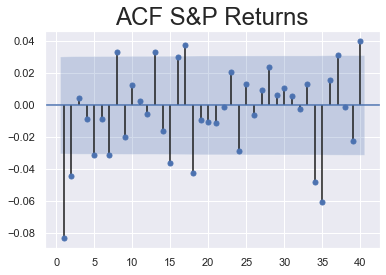

In [9]:
sgt.plot_acf(df.returns, lags=40, zero = False)
plt.title("ACF S&P Returns", size=24)
plt.show()

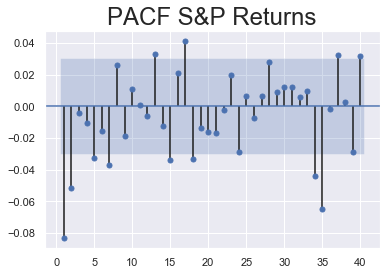

In [10]:
sgt.plot_pacf(df.returns, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P Returns", size=24)
plt.show()

AR Models

In [11]:
model_ret_ar = ARMA(df.returns, order = (1,0))
results_ret_ar = model_ret_ar.fit()
results_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(1, 0)   Log Likelihood               -6849.301
Method:                       css-mle   S.D. of innovations              1.240
Date:                Mon, 02 Mar 2020   AIC                          13704.601
Time:                        17:46:01   BIC                          13723.623
Sample:                    01-04-2000   HQIC                         13711.328
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.018      0.803      0.422      -0.020       0.049
ar.L1.returns    -0.0836      0.015     -5.422      0.000      -0.114      -0.053
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.9670           +0.0000j           11.9670            0.5000
-----------------------------------------------------------------------------
"""

In [12]:
model_ret_ar_2 = ARMA(df.returns, order = (2,0))
results_ret_ar_2 = model_ret_ar_2.fit()
results_ret_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(2, 0)   Log Likelihood               -6843.663
Method:                       css-mle   S.D. of innovations              1.239
Date:                Mon, 02 Mar 2020   AIC                          13695.326
Time:                        17:46:02   BIC                          13720.689
Sample:                    01-04-2000   HQIC                         13704.296
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.849      0.396      -0.019       0.047
ar.L1.returns    -0.0879      0.015     -5.690      0.000      -0.118      -0.058
ar.L2.returns    -0.0519      0.015     -3.360      0.001      -0.082      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8467           -4.3072j            4.3897           -0.2809
AR.2           -0.8467           +4.3072j            4.3897            0.2809
-----------------------------------------------------------------------------
"""

In [13]:
model_ret_ar_3 = ARMA(df.returns, order = (3,0))
results_ret_ar_3 = model_ret_ar_3.fit()
results_ret_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(3, 0)   Log Likelihood               -6843.630
Method:                       css-mle   S.D. of innovations              1.239
Date:                Mon, 02 Mar 2020   AIC                          13697.259
Time:                        17:46:02   BIC                          13728.963
Sample:                    01-04-2000   HQIC                         13708.471
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.852      0.394      -0.019       0.047
ar.L1.returns    -0.0881      0.015     -5.696      0.000      -0.118      -0.058
ar.L2.returns    -0.0522      0.016     -3.370      0.001      -0.083      -0.022
ar.L3.returns    -0.0040      0.015     -0.259      0.796      -0.034       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0996           -4.4077j            4.4088           -0.2536
AR.2           -0.0996           +4.4077j            4.4088            0.2536
AR.3          -12.8477           -0.0000j           12.8477           -0.5000
-----------------------------------------------------------------------------
"""

In [14]:
model_ret_ar_4 = ARMA(df.returns, order = (4,0))
results_ret_ar_4 = model_ret_ar_4.fit()
results_ret_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(4, 0)   Log Likelihood               -6843.384
Method:                       css-mle   S.D. of innovations              1.239
Date:                Mon, 02 Mar 2020   AIC                          13698.769
Time:                        17:46:02   BIC                          13736.813
Sample:                    01-04-2000   HQIC                         13712.222
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.017      0.861      0.389      -0.018       0.047
ar.L1.returns    -0.0881      0.015     -5.698      0.000      -0.118      -0.058
ar.L2.returns    -0.0528      0.016     -3.402      0.001      -0.083      -0.022
ar.L3.returns    -0.0050      0.016     -0.319      0.750      -0.035       0.025
ar.L4.returns    -0.0108      0.015     -0.701      0.484      -0.041       0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0125           -2.2528j            3.0208           -0.3660
AR.2           -2.0125           +2.2528j            3.0208            0.3660
AR.3            1.7841           -2.6317j            3.1795           -0.1552
AR.4            1.7841           +2.6317j            3.1795            0.1552
-----------------------------------------------------------------------------
"""

In [15]:
model_ret_ar_5 = ARMA(df.returns, order = (5,0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(5, 0)   Log Likelihood               -6841.116
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13696.232
Time:                        17:46:02   BIC                          13740.617
Sample:                    01-04-2000   HQIC                         13711.928
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.889      0.374      -0.017       0.046
ar.L1.returns    -0.0884      0.015     -5.722      0.000      -0.119      -0.058
ar.L2.returns    -0.0529      0.016     -3.412      0.001      -0.083      -0.023
ar.L3.returns    -0.0067      0.016     -0.430      0.667      -0.037       0.024
ar.L4.returns    -0.0137      0.016     -0.885      0.376      -0.044       0.017
ar.L5.returns    -0.0330      0.015     -2.131      0.033      -0.063      -0.003
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5013           -1.3020j            1.9872           -0.1137
AR.2            1.5013           +1.3020j            1.9872            0.1137
AR.3           -0.6779           -1.8066j            1.9296           -0.3071
AR.4           -0.6779           +1.8066j            1.9296            0.3071
AR.5           -2.0636           -0.0000j            2.0636           -0.5000
-----------------------------------------------------------------------------
"""

In [16]:
print ("LLR test: " + str(LLR_test(results_ret_ar, results_ret_ar_5, DF =4)))

LLR test: 0.003


In [17]:
model_ret_ar_6 = ARMA(df.returns, order = (6,0))
results_ret_ar_6 = model_ret_ar_6.fit()
results_ret_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 4191
Model:                     ARMA(6, 0)   Log Likelihood               -6840.605
Method:                       css-mle   S.D. of innovations              1.238
Date:                Mon, 02 Mar 2020   AIC                          13697.210
Time:                        17:46:03   BIC                          13747.936
Sample:                    01-04-2000   HQIC                         13715.148
                         - 01-26-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.016      0.903      0.366      -0.017       0.045
ar.L1.returns    -0.0890      0.015     -5.753      0.000      -0.119      -0.059
ar.L2.returns    -0.0531      0.016     -3.425      0.001      -0.084      -0.023
ar.L3.returns    -0.0068      0.016     -0.436      0.663      -0.037       0.024
ar.L4.returns    -0.0146      0.016     -0.936      0.349      -0.045       0.016
ar.L5.returns    -0.0343      0.016     -2.211      0.027      -0.065      -0.004
ar.L6.returns    -0.0156      0.015     -1.011      0.312      -0.046       0.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4386           -1.0732j            1.7948           -0.1020
AR.2            1.4386           +1.0732j            1.7948            0.1020
AR.3           -0.3639           -1.8486j            1.8841           -0.2809
AR.4           -0.3639           +1.8486j            1.8841            0.2809
AR.5           -2.1720           -0.9340j            2.3643           -0.4354
AR.6           -2.1720           +0.9340j            2.3643            0.4354
-----------------------------------------------------------------------------
"""

Analysing the Residuals

In [18]:
df['res_ret'] = results_ret_ar_5.resid

In [19]:
df.res_ret.mean()

-0.00012428271258132885

In [20]:
df.res_ret.var()

1.532735188420527

In [21]:
sts.adfuller(df.res_ret)

(-15.33935918493443,
 3.8498731426565384e-28,
 17,
 4173,
 {'1%': -3.4319180151179545,
  '5%': -2.862232862908481,
  '10%': -2.5671388169510743},
 13570.33309604411)

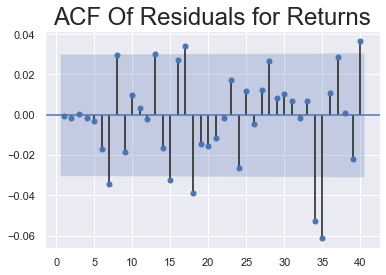

In [22]:
sgt.plot_acf(df.res_ret, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

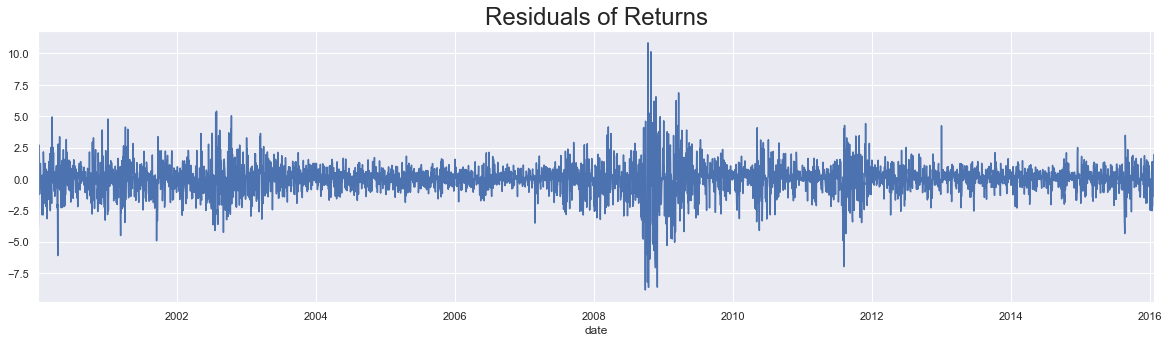

In [23]:
df.res_ret.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()